### **Dengan kNN dari Scikit Learn**

**Import Library**

Pertama-tama kita perlu melakukan import untuk library yang diperlukan nanti seperti pandas untuk mengolah csv, numpy untuk perhitungan matematis pada scratch, scikit-learn untuk mengambil modul train test split, kNN dan standard scaler.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.metrics import (confusion_matrix,
                             ConfusionMatrixDisplay,
                             classification_report,
                             accuracy_score)

**Data Setup**

Selanjutnya kita perlu menghasilkan sebuah dataframe dari dataset ke variabel iris_dt.

In [4]:
iris_dt = pd.read_csv('/content/Iris.csv')
iris_dt.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Disini saya melakukan data exploratory singkat untuk melihat berapa banyak baris pada data.

In [5]:
iris_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Target Encoding**

Untuk data target nya saya ingin di encoding supaya di hasil prediksi nya nanti rapi kelihatannya dan mudah untuk dibandingkan hasil prediksi antara k-values `5` dengan `7`. Untuk encoding saya disini menggunakan tools bawaan scikit-learn yaitu label encoder dimana tools ini akan mengganti kelas label nya dengan angka (cth: 1, 2, 3, ....) sebanyak ada berapa kelas di labelnya.

Dan di dataset iris ini karena ada 3 kelas di label nya, maka hasil encode nya akan seperti ini:

| Kelas Asli        | Kelas encoded |
|-------------------|---------------|
| Iris - setosa     |       0       |
| Iris - versicolor |       1       |
| Iris - virginica  |       2       |


In [6]:
unique_classes = iris_dt["Species"].nunique()
print(f"Jumlah unique class di target: {unique_classes}")

Jumlah unique class di target: 3


In [7]:
le = LabelEncoder()
iris_dt["Species_encoded"] = le.fit_transform(iris_dt["Species"])
print(iris_dt[["Species", "Species_encoded"]])

            Species  Species_encoded
0       Iris-setosa                0
1       Iris-setosa                0
2       Iris-setosa                0
3       Iris-setosa                0
4       Iris-setosa                0
..              ...              ...
145  Iris-virginica                2
146  Iris-virginica                2
147  Iris-virginica                2
148  Iris-virginica                2
149  Iris-virginica                2

[150 rows x 2 columns]


In [8]:
unique_classes = iris_dt["Species_encoded"].nunique()
print(f"Jumlah unique class di target: {unique_classes}")
print("Mapping class -> angka:", dict(zip(le.classes_, le.transform(le.classes_))))

Jumlah unique class di target: 3
Mapping class -> angka: {'Iris-setosa': np.int64(0), 'Iris-versicolor': np.int64(1), 'Iris-virginica': np.int64(2)}


**Data Split**

Selanjutnya kita melakukan pembagian data menjadi 2 yaitu data train dan test dengan ukuran untuk data test nya disini saya memakai 20% dari dataset dengan seed dari random_state yaitu 42 (Sebenarnya bisa berapapun bebas asalkan selama memproses data menggunakan seed yang sama).

In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris_dt.drop(['Id', 'Species', 'Species_encoded'], axis=1), iris_dt['Species_encoded'], test_size=0.2, random_state=42)

In [10]:
print(f'X-train: {X_train.shape[0]}')
print(f'y-train: {y_train.shape[0]}')
print(f'X-test: {X_test.shape[0]}')
print(f'y-test: {y_test.shape[0]}')

X-train: 120
y-train: 120
X-test: 30
y-test: 30


In [11]:
print(f'Unique class di y-train: {y_train.nunique()}')
print(f'Unique class di y-test: {y_test.nunique()}')

Unique class di y-train: 3
Unique class di y-test: 3


**Scaling Data**

Selanjutnya, sebelum fitur data train dan test kita fit ke kNN, kita perlu melakukan scaling data terlebih dahulu. Ini dikarenakan jarak antara fitur di dataset tersebut cukup jauh sehingga kita perlu menyeimbangkannya supaya saat di hitung dengan euclidean distance nanti hasil nya tidak berat sebelah. Untuk saat ini saya menggunakan tools scaling data yaitu StandardScaler yang sudah ada di library scikit-learn.

In [12]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Untuk hasil scaling nanti akan berubah dari yang sebelumnya dataframe menjadi array. Seperti berikut:

**array([[-1.47393679,  1.22037928, -1.5639872 , -1.30948358],
       [-0.13307079,  3.02001693, -1.27728011, -1.04292204],...**

In [13]:
X_train_scaled

array([[-1.47393679,  1.22037928, -1.5639872 , -1.30948358],
       [-0.13307079,  3.02001693, -1.27728011, -1.04292204],
       [ 1.08589829,  0.09560575,  0.38562104,  0.28988568],
       [-1.23014297,  0.77046987, -1.21993869, -1.30948358],
       [-1.7177306 ,  0.32056046, -1.39196294, -1.30948358],
       [ 0.59831066, -1.25412249,  0.72966956,  0.95628954],
       [ 0.72020757,  0.32056046,  0.44296246,  0.42316645],
       [-0.74255534,  0.99542457, -1.27728011, -1.30948358],
       [-0.98634915,  1.22037928, -1.33462153, -1.30948358],
       [-0.74255534,  2.34515281, -1.27728011, -1.44276436],
       [-0.01117388, -0.80421307,  0.78701097,  0.95628954],
       [ 0.23261993,  0.77046987,  0.44296246,  0.55644722],
       [ 1.08589829,  0.09560575,  0.5576453 ,  0.42316645],
       [-0.49876152,  1.8952434 , -1.39196294, -1.04292204],
       [-0.49876152,  1.44533399, -1.27728011, -1.30948358],
       [-0.37686461, -1.47907719, -0.01576889, -0.24323741],
       [ 0.59831066, -0.

**Pengujian dengan Menggunakan Stratified K-Fold**

In [14]:
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

knn = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    metric='euclidean'
    )

scores = []
for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train), 1):
    X_tr = X_train.iloc[train_index]
    X_val = X_train.iloc[val_index]
    y_tr = y_train.iloc[train_index]
    y_val = y_train.iloc[val_index]

    scaler = StandardScaler()
    X_tr_scaled = scaler.fit_transform(X_tr)
    X_val_scaled = scaler.transform(X_val)

    knn.fit(X_tr_scaled, y_tr)
    y_val_pred = knn.predict(X_val_scaled)
    acc_val = accuracy_score(y_val, y_val_pred)
    scores.append(acc_val)
    print(f"Fold {fold} - Akurasi validasi: {acc_val:.4f}")

print(f"Rata-rata akurasi: {np.mean(scores):.4f}")

Fold 1 - Akurasi validasi: 0.9583
Fold 2 - Akurasi validasi: 0.9583
Fold 3 - Akurasi validasi: 0.8333
Fold 4 - Akurasi validasi: 0.9583
Fold 5 - Akurasi validasi: 1.0000
Rata-rata akurasi: 0.9417


**Model Building**

Selanjutnya yaitu membangun model dengan kNN dari scikit-learn. Disini kita melakukan fit dengan kNN nya dengan data x-train yang sudah di scaling tadi dan juga data y-train. Dan hasil prediksi nya yaitu hasil prediksi dari data x-test yang sudah di split tadi. Untuk parameter nya sendiri menggunakan euclidean, dan k nya yang akan dibandingkan yaitu antara `5` dengan `7`.

In [15]:
def library_knn(k):
  knn = KNeighborsClassifier(
  n_neighbors=k,
  weights='uniform',
  metric='euclidean'
  )

  knn.fit(X_train_scaled, y_train)
  pred = knn.predict(X_test_scaled)
  return (f"k-value: {k}, {pred}")

def confusion_matrix_knn(k):
  knn = KNeighborsClassifier(
  n_neighbors=k,
  weights='uniform',
  metric='euclidean'
  )

  knn.fit(X_train_scaled, y_train)
  y_pred = knn.predict(X_test_scaled)
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
  disp.plot(cmap=plt.cm.Blues)
  plt.show()

In [16]:
for k in [5, 7]:
  print(library_knn(k))

k-value: 5, [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
k-value: 7, [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


Dihasil prediksi nya antara k-values `5` dengan `7` terlihat tidak terdapat perbedaan hasil prediksi diantara keduanya.

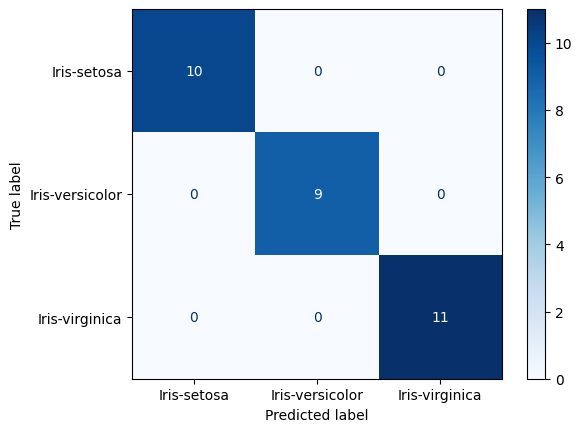

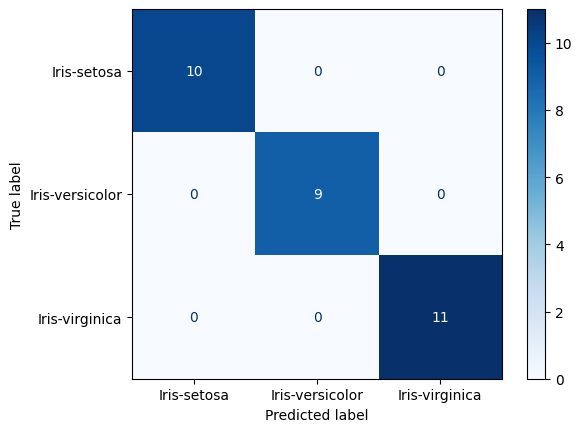

In [17]:
for k in [5, 7]:
  confusion_matrix_knn(k)

Dan di confusion matrix nya dengan y-actual yaitu y-test yang sudah di split tadi, bisa dibilang hasil prediksi kedua model nya sudah 100% benar.

### **Dengan kNN from Scratch**

Untuk yang from scratch ini alurnya hampir sama dengan yang tadi, tapi mungkin saat di eval nya untuk yang from scratch hanya mengukur accuracy nya dan menggunakan StratifiedKFold untuk menguji model nya ke beberapa sampel di dataset (di kasus ini saya menggunakan 5 sample). Sekian ≽^•⩊•^≼

In [18]:
from random import seed, randrange
from csv import reader
from math import sqrt

In [19]:
def load_csv(filename):
    dataset = []
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        next(csv_reader, None)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row[1:])    # drop 'Id' column
    return dataset

def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = sorted(set(class_values))   # sorted -> mapping stabil
    lookup = {v:i for i, v in enumerate(unique)}
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup

In [20]:
seed(42)
filename = '/content/Iris.csv'
dataset = load_csv(filename)

for i in range(len(dataset[0]) - 1):
    str_column_to_float(dataset, i)

label_map = str_column_to_int(dataset, len(dataset[0]) - 1)
print("Label map:", label_map)

Label map: {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [21]:
def dataset_minmax(dataset):
    minmax = []
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

In [22]:
def cross_validation_split(dataset, n_folds):
    dataset_split, dataset_copy = [], list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for _ in range(n_folds):
        fold = []
        while len(fold) < fold_size and dataset_copy:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

def accuracy_metric(actual, predicted):
    correct = sum(1 for a, p in zip(actual, predicted) if a == p)
    return correct / float(len(actual)) * 100.0

def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = []
    for fold in folds:
        train_set = sum([f for f in folds if f is not fold], [])
        test_set = []
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        scores.append(accuracy_metric(actual, predicted))
    return scores

def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

def get_neighbors(train, test_row, num_neighbors):
    distances = [(train_row, euclidean_distance(test_row, train_row)) for train_row in train]
    distances.sort(key=lambda x: x[1])
    return [distances[i][0] for i in range(num_neighbors)]

def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    return max(set(output_values), key=output_values.count)

def k_nearest_neighbors(train, test, num_neighbors):
    return [predict_classification(train, row, num_neighbors) for row in test]

In [23]:
# evaluasi
n_folds = 5
num_neighbors = 5
scores = evaluate_algorithm(dataset, k_nearest_neighbors, n_folds, num_neighbors)
print('Scores:', scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [93.33333333333333, 100.0, 100.0, 93.33333333333333, 93.33333333333333]
Mean Accuracy: 96.000%
